In [1]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
sys.path.insert(0, 'src')
from helper import *
from eda import *
from train import *                       
from etl import *

%load_ext autoreload

%autoreload 2

### etl (new readfilerun and gen)

In [4]:
# %%timeit
df = readfilerun_simple('data/raw/train_r/20220116T055105_20-100-true-20-100-iperf.csv')
df10 = agg10(genfeat(df))
# df

In [ ]:
genfeat(df)

,Time,IP1,Port1,IP2,Port2,Proto,1->2Bytes,2->1Bytes,1->2Pkts,2->1Pkts,...,pkt sum,longest_seq,mean_tdelta,max_tdelta,number_ms,max_bytes,total_pkt_sizes,pkt_ratio,time_spread,byte_ratio
0,1642312265,172.21.0.3,40878,172.19.0.2,5001,6,553500,18292,369,316,...,571792,8,1.008772,29,137,19628,571792,834.732847,690,834.732847
1,1642312266,172.21.0.3,40878,172.19.0.2,5001,6,235500,8432,157,155,...,243932,4,3.135048,27,79,9260,243932,781.833333,975,781.833333
2,1642312267,172.21.0.3,40878,172.19.0.2,5001,6,289500,9988,193,186,...,299488,3,2.574074,22,62,9364,299488,790.205805,973,790.205805
3,1642312268,172.21.0.3,40878,172.19.0.2,5001,6,405000,9228,270,173,...,414228,8,2.235294,22,63,13708,414228,935.051919,988,935.051919
5,1642312269,172.21.0.3,40878,172.19.0.2,5001,6,232500,3364,155,61,...,235864,8,4.562791,90,46,12052,235864,1091.962963,981,1091.962963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,1642312560,172.21.0.3,40878,172.19.0.2,5001,6,309000,4152,206,78,...,313152,6,3.286219,43,26,16796,313152,1102.647887,930,1102.647887
302,1642312561,172.21.0.3,40878,172.19.0.2,5001,6,237000,3576,158,66,...,240576,6,4.372197,43,35,13708,240576,1074.000000,975,1074.000000
303,1642312562,172.21.0.3,40878,172.19.0.2,5001,6,366000,4896,244,93,...,370896,6,2.901786,43,27,21312,370896,1100.581602,975,1100.581602
304,1642312563,172.21.0.3,40878,172.19.0.2,5001,6,316500,4548,211,84,...,321048,6,3.176871,43,28,21260,321048,1088.298305,934,1088.298305


In [5]:
df['group'] = df.index // 20
print(df.shape)
# df.groupby('group').agg(pd.Series.mode)
agg20 = better_agg(genfeat(df), 20)
agg20

(300, 33)


TypeError: 'float' object is not iterable

In [6]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer

df = pd.read_csv('outputs\\combined_transform.csv')
df


,total_bytes,max_bytes,max_bytes_std,Proto,1->2Bytes,2->1Bytes,1->2Pkts,2->1Pkts,total_pkts,total_pkts_amin,...,mean_tdelta,mean_tdelta_amin,mean_tdelta_amax,max_tdelta,max_tdelta_amin,max_tdelta_amax,latency,loss,later_latency,later_loss
0,1.254904e+06,16261.600000,4620.980252,6,1231800.0,23103.600000,821.2,437.100000,1258.300000,784,...,0.764622,0.431958,1.233716,85.700000,34,168,20,2000,20,2000
1,1.725599e+06,18534.000000,9597.535841,6,1697400.0,28198.800000,1131.6,539.700000,1671.300000,1440,...,0.599958,0.473884,0.694232,26.600000,9,58,20,2000,20,2000
2,2.036650e+06,15224.800000,2460.232184,6,2003550.0,33099.600000,1335.7,633.000000,1968.700000,1695,...,0.511561,0.438133,0.586777,17.500000,9,29,20,2000,20,2000
3,1.773898e+06,12337.200000,1822.065299,6,1744500.0,29397.600000,1163.0,561.600000,1724.600000,1512,...,0.580953,0.511329,0.660490,12.500000,8,19,20,2000,20,2000
4,1.809538e+06,14474.400000,2964.950335,6,1780200.0,29338.400000,1186.8,561.200000,1748.000000,1485,...,0.575136,0.476533,0.673181,11.600000,9,14,20,2000,20,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,1.453144e+06,43376.000000,63066.672755,6,1432542.0,20602.000000,955.1,381.400000,1336.500000,985,...,0.762178,0.652089,1.015244,345.300000,296,389,500,20000,500,20000
7899,1.469423e+06,22056.800000,3065.345107,6,1448550.0,20872.800000,965.7,401.400000,1367.100000,1309,...,0.731089,0.687802,0.763761,297.700000,297,298,500,20000,500,20000
7900,1.948442e+06,141769.200000,125573.709804,6,1921807.2,26635.200000,1281.4,496.500000,1777.900000,993,...,0.453401,0.198994,0.683778,189.600000,60,300,500,20000,500,20000
7901,1.381635e+06,77196.800000,112507.390087,6,1363030.8,18604.400000,908.7,326.600000,1235.300000,680,...,0.590896,0.332620,0.913108,198.200000,137,262,500,20000,500,20000


In [7]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer

df = pd.read_csv('outputs\\combined_transform.csv')
df


,total_bytes,max_bytes,max_bytes_std,Proto,1->2Bytes,2->1Bytes,1->2Pkts,2->1Pkts,total_pkts,total_pkts_amin,...,mean_tdelta,mean_tdelta_amin,mean_tdelta_amax,max_tdelta,max_tdelta_amin,max_tdelta_amax,latency,loss,later_latency,later_loss
0,1.254904e+06,16261.600000,4620.980252,6,1231800.0,23103.600000,821.2,437.100000,1258.300000,784,...,0.764622,0.431958,1.233716,85.700000,34,168,20,2000,20,2000
1,1.725599e+06,18534.000000,9597.535841,6,1697400.0,28198.800000,1131.6,539.700000,1671.300000,1440,...,0.599958,0.473884,0.694232,26.600000,9,58,20,2000,20,2000
2,2.036650e+06,15224.800000,2460.232184,6,2003550.0,33099.600000,1335.7,633.000000,1968.700000,1695,...,0.511561,0.438133,0.586777,17.500000,9,29,20,2000,20,2000
3,1.773898e+06,12337.200000,1822.065299,6,1744500.0,29397.600000,1163.0,561.600000,1724.600000,1512,...,0.580953,0.511329,0.660490,12.500000,8,19,20,2000,20,2000
4,1.809538e+06,14474.400000,2964.950335,6,1780200.0,29338.400000,1186.8,561.200000,1748.000000,1485,...,0.575136,0.476533,0.673181,11.600000,9,14,20,2000,20,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,1.453144e+06,43376.000000,63066.672755,6,1432542.0,20602.000000,955.1,381.400000,1336.500000,985,...,0.762178,0.652089,1.015244,345.300000,296,389,500,20000,500,20000
7899,1.469423e+06,22056.800000,3065.345107,6,1448550.0,20872.800000,965.7,401.400000,1367.100000,1309,...,0.731089,0.687802,0.763761,297.700000,297,298,500,20000,500,20000
7900,1.948442e+06,141769.200000,125573.709804,6,1921807.2,26635.200000,1281.4,496.500000,1777.900000,993,...,0.453401,0.198994,0.683778,189.600000,60,300,500,20000,500,20000
7901,1.381635e+06,77196.800000,112507.390087,6,1363030.8,18604.400000,908.7,326.600000,1235.300000,680,...,0.590896,0.332620,0.913108,198.200000,137,262,500,20000,500,20000


In [8]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer

df = pd.read_csv('outputs\\combined_transform.csv')
df


,total_bytes,max_bytes,max_bytes_std,Proto,1->2Bytes,2->1Bytes,1->2Pkts,2->1Pkts,total_pkts,total_pkts_amin,...,mean_tdelta,mean_tdelta_amin,mean_tdelta_amax,max_tdelta,max_tdelta_amin,max_tdelta_amax,latency,loss,later_latency,later_loss
0,1.254904e+06,16261.600000,4620.980252,6,1231800.0,23103.600000,821.2,437.100000,1258.300000,784,...,0.764622,0.431958,1.233716,85.700000,34,168,20,2000,20,2000
1,1.725599e+06,18534.000000,9597.535841,6,1697400.0,28198.800000,1131.6,539.700000,1671.300000,1440,...,0.599958,0.473884,0.694232,26.600000,9,58,20,2000,20,2000
2,2.036650e+06,15224.800000,2460.232184,6,2003550.0,33099.600000,1335.7,633.000000,1968.700000,1695,...,0.511561,0.438133,0.586777,17.500000,9,29,20,2000,20,2000
3,1.773898e+06,12337.200000,1822.065299,6,1744500.0,29397.600000,1163.0,561.600000,1724.600000,1512,...,0.580953,0.511329,0.660490,12.500000,8,19,20,2000,20,2000
4,1.809538e+06,14474.400000,2964.950335,6,1780200.0,29338.400000,1186.8,561.200000,1748.000000,1485,...,0.575136,0.476533,0.673181,11.600000,9,14,20,2000,20,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,1.453144e+06,43376.000000,63066.672755,6,1432542.0,20602.000000,955.1,381.400000,1336.500000,985,...,0.762178,0.652089,1.015244,345.300000,296,389,500,20000,500,20000
7899,1.469423e+06,22056.800000,3065.345107,6,1448550.0,20872.800000,965.7,401.400000,1367.100000,1309,...,0.731089,0.687802,0.763761,297.700000,297,298,500,20000,500,20000
7900,1.948442e+06,141769.200000,125573.709804,6,1921807.2,26635.200000,1281.4,496.500000,1777.900000,993,...,0.453401,0.198994,0.683778,189.600000,60,300,500,20000,500,20000
7901,1.381635e+06,77196.800000,112507.390087,6,1363030.8,18604.400000,908.7,326.600000,1235.300000,680,...,0.590896,0.332620,0.913108,198.200000,137,262,500,20000,500,20000


In [9]:
indexcol = ['total_bytes','max_bytes','2->1Bytes','2->1Pkts','total_pkts', 'total_pkts_min', 'total_pkts_max', 'number_ms', 'pkt_ratio','time_spread', 'time_spread_min','time_spread_max','pkt sum','longest_seq', 'longest_seq_min', 'longest_seq_max','total_pkt_sizes','byte_ratio', 'mean_tdelta', 'max_tdelta']
len(indexcol)

20

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer

label_col = 'loss'

df = pd.read_csv('outputs\\combined_transform.csv')

# indexcol = ['total_bytes','max_bytes','2->1Bytes','2->1Pkts','total_pkts', 'total_pkts_min', 'total_pkts_max', 'number_ms', 'pkt_ratio','time_spread', 'time_spread_min','time_spread_max','pkt sum','longest_seq', 'longest_seq_min', 'longest_seq_max','total_pkt_sizes','byte_ratio', 'mean_tdelta', 'max_tdelta']
indexcol = ['total_bytes', 'max_bytes', '2->1Bytes', '2->1Pkts', 'total_pkts',
       'number_ms', 'pkt_ratio', 'time_spread', 'pkt sum', 'longest_seq',
       'total_pkt_sizes', 'byte_ratio', 'mean_tdelta', 'max_tdelta']
# print(len(indexcol),df[[x for x in indexcol if x in df.columns]])

X_train, X_test, y_train, y_test = train_test_split(
    df[[x for x in indexcol if x in df.columns]], df[label_col])
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
etree = ExtraTreesRegressor(n_estimators=400, n_jobs=4)
etreeft = etree.fit(X_train,y_train)

y_pred3 = etree.predict(X_test)
acc3= mean_squared_error(y_test, y_pred3)

print(f'mse: {acc3}, r2: {etree.score(X_test, y_test)}')
feat_imp = pd.Series(index=[x for x in indexcol if x in df.columns], 
          data=etree.feature_importances_).sort_values(ascending=False)
feat_imp

14        total_bytes      max_bytes     2->1Bytes    2->1Pkts   total_pkts  \
0     1.254904e+06   16261.600000  23103.600000  437.100000  1258.300000   
1     1.725599e+06   18534.000000  28198.800000  539.700000  1671.300000   
2     2.036650e+06   15224.800000  33099.600000  633.000000  1968.700000   
3     1.773898e+06   12337.200000  29397.600000  561.600000  1724.600000   
4     1.809538e+06   14474.400000  29338.400000  561.200000  1748.000000   
...            ...            ...           ...         ...          ...   
7898  1.453144e+06   43376.000000  20602.000000  381.400000  1336.500000   
7899  1.469423e+06   22056.800000  20872.800000  401.400000  1367.100000   
7900  1.948442e+06  141769.200000  26635.200000  496.500000  1777.900000   
7901  1.381635e+06   77196.800000  18604.400000  326.600000  1235.300000   
7902  1.024809e+06   19777.333333  20193.333333  388.333333  1058.333333   

       number_ms    pkt_ratio  time_spread       pkt sum  longest_seq  \
0     284.4

2->1Bytes          0.141219
2->1Pkts           0.125197
total_pkts         0.112167
max_tdelta         0.097446
total_bytes        0.083169
total_pkt_sizes    0.080858
number_ms          0.079968
pkt sum            0.079353
mean_tdelta        0.046873
time_spread        0.042817
max_bytes          0.028465
pkt_ratio          0.028179
byte_ratio         0.028113
longest_seq        0.026177
dtype: float64

In [11]:
df = readfilerun_simple('data/raw/switch/20220119T055428_300-500-true-300-5000-iperf.csv', 'data/raw/switch')
df.head()

,Time,IP1,Port1,IP2,Port2,Proto,1->2Bytes,2->1Bytes,1->2Pkts,2->1Pkts,packet_times,packet_sizes,packet_dirs,event,drop_unix,latency,loss,later_latency,later_loss,deterministic
0,1642571669,172.21.0.3,40760,172.19.0.2,5001,6,13664,60,11,1,1642571669465;1642571669465;1642571669465;1642...,60;52;112;1500;1500;1500;1500;1500;1500;1500;1...,2;1;1;1;1;1;1;1;1;1;1;1;,NaN,NaN,300,500,300,5000,True
4,1642571670,172.21.0.3,40760,172.19.0.2,5001,6,84000,1040,56,20,1642571670068;1642571670068;1642571670068;1642...,52;1500;1500;52;1500;1500;52;1500;1500;52;1500...,2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;2;1;...,drop,1642571670.678649,300,500,300,5000,True
5,1642571671,172.21.0.3,40760,172.19.0.2,5001,6,189000,3152,126,56,1642571671276;1642571671276;1642571671276;1642...,52;1500;1500;1500;1500;52;1500;1500;52;1500;15...,2;1;1;1;1;2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;2;1;1;...,drop,1642571671.890071,300,500,300,5000,True
6,1642571672,172.21.0.3,40760,172.19.0.2,5001,6,81000,2768,54,50,1642571672483;1642571672483;1642571672484;1642...,52;1500;52;1500;1500;52;52;1500;1500;52;1500;1...,2;1;2;1;1;2;2;1;1;2;1;1;2;2;1;1;2;2;1;1;2;1;1;...,NaN,NaN,300,500,300,5000,True
7,1642571673,172.21.0.3,40760,172.19.0.2,5001,6,132000,4264,88,76,1642571673087;1642571673087;1642571673087;1642...,64;64;1500;64;1500;64;1500;64;64;1500;64;1500;...,2;2;1;2;1;2;1;2;2;1;2;1;2;2;1;2;1;2;2;1;2;1;2;...,NaN,NaN,300,500,300,5000,True


In [12]:
tdf = agg10(genfeat(df))
tdf.head()

,total_bytes,max_bytes,proto,1->2Bytes,2->1Bytes,1->2Pkts,2->1Pkts,total_pkts,total_pkts_min,total_pkts_max,...,pkt sum,longest_seq,longest_seq_min,longest_seq_max,total_pkt_sizes,byte_ratio,mean_tdelta,max_tdelta,loss,latency
0,107325.6,7132.184842,6.0,104266.4,3059.2,69.7,56.3,126.0,12.0,192.0,...,107325.6,4.6,2.0,11.0,107325.6,1069.182256,2.647068,358.2,500.0,300.0
1,149212.8,3786.317918,6.0,146850.0,2362.8,97.9,44.6,142.5,74.0,184.0,...,149212.8,5.5,4.0,8.0,149212.8,1069.182256,5.601969,408.7,500.0,300.0
2,132266.4,5905.853729,6.0,130350.0,1916.4,86.9,36.0,122.9,64.0,185.0,...,132266.4,5.9,4.0,8.0,132266.4,1069.182256,8.013509,217.9,500.0,300.0
3,562985.2,10036.535604,6.0,554400.0,8585.2,369.6,157.1,526.7,320.0,923.0,...,562985.2,7.2,4.0,10.0,562985.2,1069.182256,1.942601,134.0,500.0,300.0
4,361448.4,3214.724706,6.0,355800.0,5648.4,237.2,105.3,342.5,222.0,441.0,...,361448.4,6.3,4.0,11.0,361448.4,1069.182256,2.972111,88.7,500.0,300.0


In [13]:
tdf_x = tdf[indexcol]
tdf_x
tdf['loss_pred'] = etree.predict(tdf_x)
tdf['loss_pred']

0       574.750
1       594.875
2       426.625
3      4394.625
4      1999.125
5       515.500
6       299.500
7       482.375
8       308.000
9       318.000
10      337.250
11      242.750
12      324.250
13      474.875
14      943.500
15      735.000
16      408.375
17      769.750
18     2073.000
19    11490.000
20    11645.000
21     6793.750
22     7562.500
23     3344.375
24     3993.125
25     6301.250
26    13685.000
27    11645.000
28     8106.875
29     7178.375
Name: loss_pred, dtype: float64

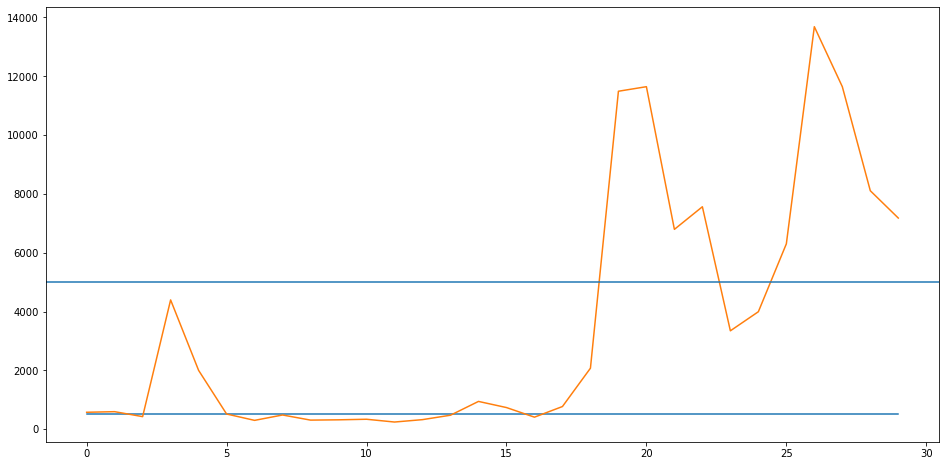

In [14]:
plt.figure(figsize=(16, 8))
tdf['loss'].plot()
tdf['loss_pred'].plot()
plt.axhline(5000)

In [15]:
tdf.iloc[0]

total_bytes        107325.600000
max_bytes            7132.184842
proto                   6.000000
1->2Bytes          104266.400000
2->1Bytes            3059.200000
1->2Pkts               69.700000
2->1Pkts               56.300000
total_pkts            126.000000
total_pkts_min         12.000000
total_pkts_max        192.000000
number_ms              14.600000
pkt_ratio             884.515287
time_spread           374.800000
time_spread_min         0.000000
time_spread_max       635.000000
pkt sum            107325.600000
longest_seq             4.600000
longest_seq_min         2.000000
longest_seq_max        11.000000
total_pkt_sizes    107325.600000
byte_ratio           1069.182256
mean_tdelta             2.647068
max_tdelta            358.200000
loss                  500.000000
latency               300.000000
loss_pred             574.750000
Name: 0, dtype: float64

In [16]:
print(f'mse: {acc3}, r2: {etree.score(X_test, y_test)}')
feat_imp = pd.Series(index=[x for x in indexcol if x in df.columns], 
          data=etree.feature_importances_).sort_values(ascending=False)
feat_imp

mse: 14668948.018574456, r2: 0.6634136555000352


2->1Bytes          0.141219
2->1Pkts           0.125197
total_pkts         0.112167
max_tdelta         0.097446
total_bytes        0.083169
total_pkt_sizes    0.080858
number_ms          0.079968
pkt sum            0.079353
mean_tdelta        0.046873
time_spread        0.042817
max_bytes          0.028465
pkt_ratio          0.028179
byte_ratio         0.028113
longest_seq        0.026177
dtype: float64

In [17]:
pd.Series(index=[x for x in indexcol if x in df.columns], 
          data=etree.feature_importances_).sort_values(ascending=False)


2->1Bytes          0.141219
2->1Pkts           0.125197
total_pkts         0.112167
max_tdelta         0.097446
total_bytes        0.083169
total_pkt_sizes    0.080858
number_ms          0.079968
pkt sum            0.079353
mean_tdelta        0.046873
time_spread        0.042817
max_bytes          0.028465
pkt_ratio          0.028179
byte_ratio         0.028113
longest_seq        0.026177
dtype: float64